In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
#https://www.kaggle.com/datasets/lodetomasi1995/income-classification
df = pd.read_csv("income_evaluation.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

In [6]:
col_names = ['age', 'workclass', 'finalweight', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [7]:
df.columns = col_names

In [8]:
df.columns

Index(['age', 'workclass', 'finalweight', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   finalweight     32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.describe()

,age,finalweight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [12]:
categorical = [col for col in df.columns if df[col].dtype=='O']
numerical = [col for col in df.columns if df[col].dtype!='O']

In [13]:
print(categorical)
print(numerical)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
['age', 'finalweight', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [14]:
df.head()

,age,workclass,finalweight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
for col in categorical:
    print(df[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [16]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [17]:
df['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

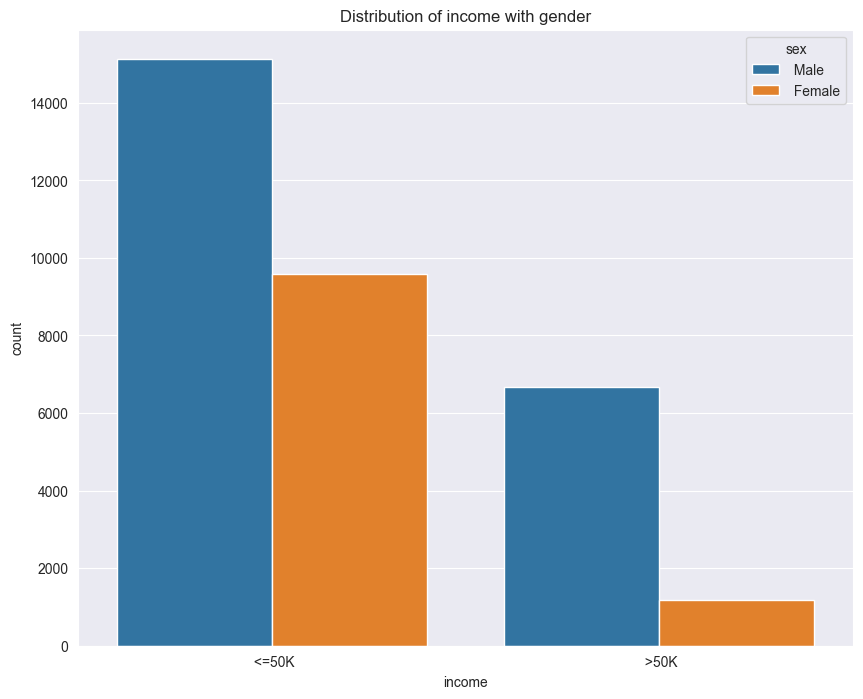

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="sex", data=df)
ax.set_title("Distribution of income with gender")
plt.show()

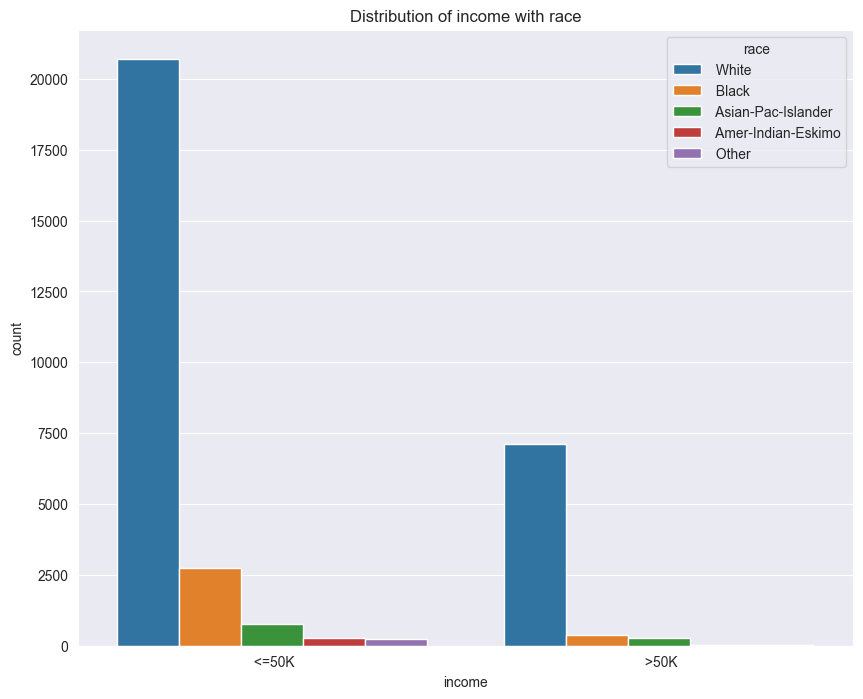

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=df)
ax.set_title("Distribution of income with race")
plt.show()

In [20]:
#males making more than females
#white making more than other races

In [21]:
df.head()

,age,workclass,finalweight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [23]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [25]:
df['workclass']=df['workclass'].replace(' ?', np.nan)

In [26]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [27]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [28]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [29]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [30]:
df['occupation']=df['occupation'].replace(' ?', np.nan)

In [31]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [32]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [33]:
df['native_country']=df['native_country'].replace(' ?', np.nan)

In [34]:
df['native_country'].value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [35]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [36]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [37]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [38]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [39]:
df[numerical].isnull().sum()

age               0
finalweight       0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

In [40]:
# I will deal with null values, now I will produce some graphs

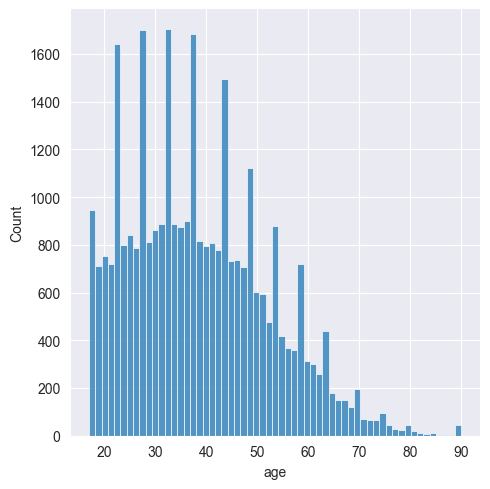

In [41]:
sns.displot(df['age'])
plt.show()

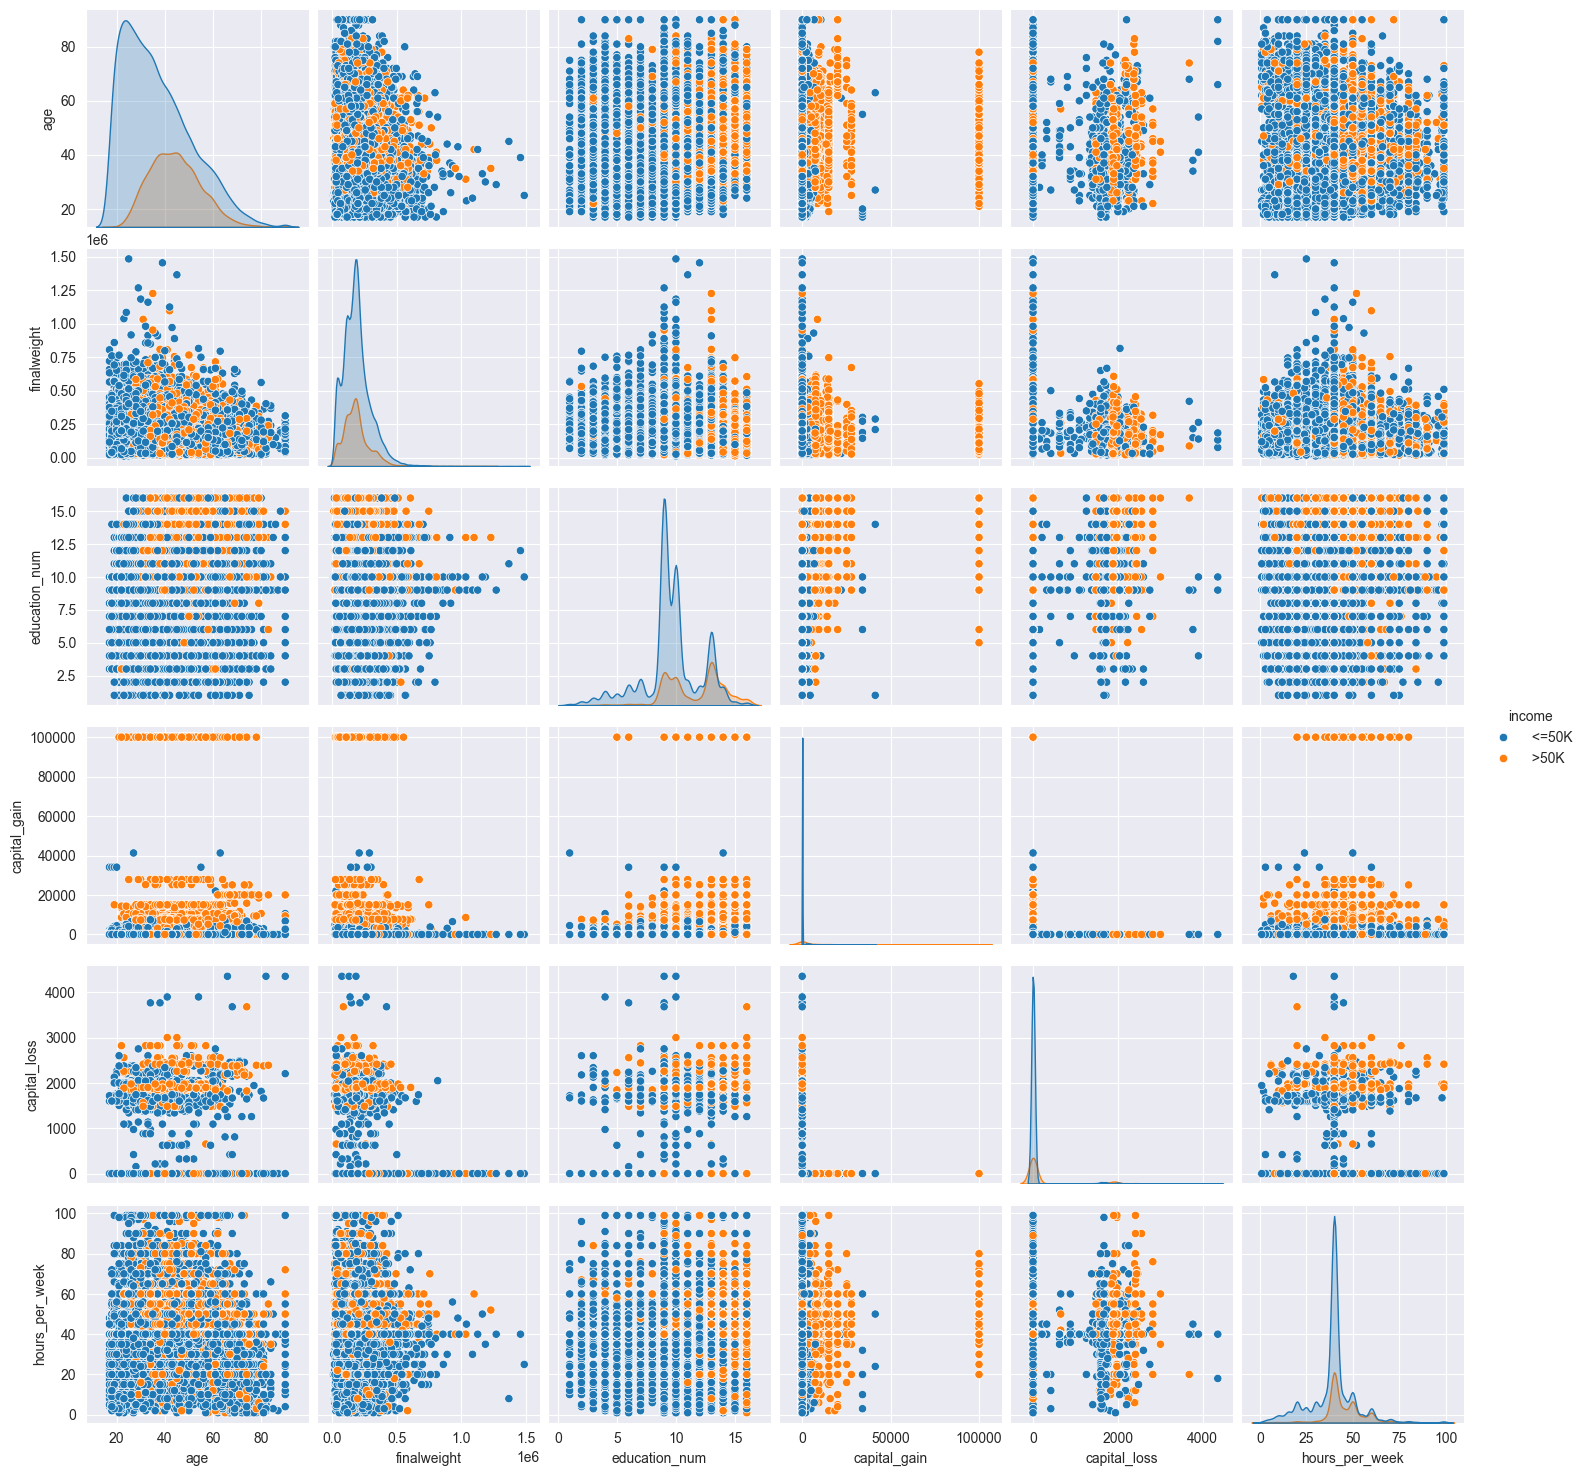

In [42]:
sns.pairplot(df, hue="income")
plt.show()

In [43]:
# features

In [44]:
X = df.drop(['income'], axis=1)
y = df['income']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [46]:
# I will get categorical columns one more time because income is not in the X variable.
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

In [47]:
X_train[categorical].isnull().sum()

workclass         1276
education            0
marital_status       0
occupation        1278
relationship         0
race                 0
sex                  0
native_country     414
dtype: int64

In [48]:
# there are a lot of missing data, so I am going to impute missing data with mode of that categorical variable

In [49]:
X_train['workclass'].mode()

0     Private
Name: workclass, dtype: object

In [50]:
X_train['workclass'].mode()[0]

' Private'

In [51]:
# use mode of X_train rather than X_test to impute
for i in [X_train, X_test]:
    i['workclass'] = i['workclass'].fillna(X_train['workclass'].mode()[0])
    i['occupation'] = i['occupation'].fillna(X_train['occupation'].mode()[0])
    i['native_country'] = i['native_country'].fillna(X_train['native_country'].mode()[0])

In [52]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [53]:
X_train.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [54]:
X_test.isnull().sum()

age               0
workclass         0
finalweight       0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [55]:
# encoding

In [56]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [57]:
print(df[categorical].nunique())

workclass          8
education         16
marital_status     7
occupation        14
relationship       6
race               5
sex                2
native_country    41
dtype: int64


In [58]:
# There are many unique values in native_country. if we do one hot encoding it might work, but it might get complicated due to so many columns
# And it may lead to overfitting or underperforming generally
# Si I will do target encoding for native country and one hot encoding for the rest.
# For target encoding I will get the mean of every unique value and replace it with them

In [59]:
# in order to get a mean from income column, I need to make it 1 or 0
y_train_binary = y_train.apply(lambda x: 1 if x.strip() == '>50K' else 0) #if >50k then 1, else 0. y_train has only one column

# this will give me the average of 0s and 1s for native countries, so I can encode it using these values
target_means = y_train_binary.groupby(X_train['native_country']).mean()

In [63]:
target_means

native_country
Cambodia                      0.333333
Canada                        0.309524
China                         0.241379
Columbia                      0.021739
Cuba                          0.257143
Dominican-Republic            0.021277
Ecuador                       0.166667
El-Salvador                   0.101449
England                       0.295082
France                        0.300000
Germany                       0.284091
Greece                        0.263158
Guatemala                     0.041667
Haiti                         0.093750
Holand-Netherlands            0.000000
Honduras                      0.100000
Hong                          0.272727
Hungary                       0.111111
India                         0.391304
Iran                          0.366667
Ireland                       0.187500
Italy                         0.354167
Jamaica                       0.090909
Japan                         0.395349
Laos                          0.200000
Mexico    

In [64]:
X_train['native_country_encoded'] = X_train['native_country'].map(target_means)
X_train['native_country_encoded'] = X_train['native_country_encoded'].fillna(y_train_binary.mean())

X_test['native_country_encoded'] = X_test['native_country'].map(target_means)
X_test['native_country_encoded'] = X_test['native_country_encoded'].fillna(y_train_binary.mean())

In [65]:
X_train = X_train.drop("native_country", axis=1)
X_test = X_test.drop("native_country", axis=1)

In [66]:
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [67]:
# rest will be one hot encoded

one_hot_categories = ['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex']

In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), one_hot_categories) #sparse_output=False => to make standard matrix (table)
    ],
    remainder='passthrough'  # leave the rest of the columns as it is
)

# Fit-transform
X_train_enc = encoder.fit_transform(X_train)
X_test_enc = encoder.transform(X_test)

In [75]:
X_train_enc

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        60.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        38.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        50.        ,  0.24572168],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        40.        ,  0.24572168],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        45.        ,  0.24572168],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        48.        ,  0.24572168]], shape=(22792, 65))

In [76]:
# get all encoded column names
columns = encoder.get_feature_names_out()

In [77]:
columns

array(['cat__workclass_ Federal-gov', 'cat__workclass_ Local-gov',
       'cat__workclass_ Never-worked', 'cat__workclass_ Private',
       'cat__workclass_ Self-emp-inc', 'cat__workclass_ Self-emp-not-inc',
       'cat__workclass_ State-gov', 'cat__workclass_ Without-pay',
       'cat__education_ 10th', 'cat__education_ 11th',
       'cat__education_ 12th', 'cat__education_ 1st-4th',
       'cat__education_ 5th-6th', 'cat__education_ 7th-8th',
       'cat__education_ 9th', 'cat__education_ Assoc-acdm',
       'cat__education_ Assoc-voc', 'cat__education_ Bachelors',
       'cat__education_ Doctorate', 'cat__education_ HS-grad',
       'cat__education_ Masters', 'cat__education_ Preschool',
       'cat__education_ Prof-school', 'cat__education_ Some-college',
       'cat__marital_status_ Divorced',
       'cat__marital_status_ Married-AF-spouse',
       'cat__marital_status_ Married-civ-spouse',
       'cat__marital_status_ Married-spouse-absent',
       'cat__marital_status_ Never-mar

In [78]:
X_train = pd.DataFrame(X_train_enc, columns=columns, index=X_train.index)
X_test = pd.DataFrame(X_test_enc, columns=columns, index=X_test.index)

In [79]:
X_train

,cat__workclass_ Federal-gov,cat__workclass_ Local-gov,cat__workclass_ Never-worked,cat__workclass_ Private,cat__workclass_ Self-emp-inc,cat__workclass_ Self-emp-not-inc,cat__workclass_ State-gov,cat__workclass_ Without-pay,cat__education_ 10th,cat__education_ 11th,...,cat__race_ White,cat__sex_ Female,cat__sex_ Male,remainder__age,remainder__finalweight,remainder__education_num,remainder__capital_gain,remainder__capital_loss,remainder__hours_per_week,remainder__native_country_encoded
32098,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,45.0,170871.0,9.0,7298.0,0.0,60.0,0.245722
25206,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,47.0,108890.0,9.0,1831.0,0.0,38.0,0.245722
23491,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,48.0,187505.0,10.0,0.0,0.0,50.0,0.245722
12367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,29.0,145592.0,9.0,0.0,0.0,40.0,0.041667
7054,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,23.0,203003.0,4.0,0.0,0.0,25.0,0.284091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,43.0,33331.0,14.0,0.0,0.0,40.0,0.245722
19648,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,44.0,98466.0,6.0,0.0,0.0,35.0,0.245722
9845,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,23.0,45317.0,10.0,0.0,0.0,40.0,0.245722
10799,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,45.0,215862.0,16.0,7688.0,0.0,45.0,0.245722


In [80]:
#training

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier(n_estimators=10, random_state=15)
rfc.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",10
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(

In [83]:
y_pred = rfc.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [88]:
print(f'Model accuracy score with 10 decision-trees : {accuracy_score(y_test, y_pred)}')
print(f'Model confusion_matrix with 10 decision-trees : \n{confusion_matrix(y_test, y_pred)}')

Model accuracy score with 10 decision-trees : 0.8470672535571706
Model confusion_matrix with 10 decision-trees : 
[[6891  516]
 [ 978 1384]]


In [90]:
# instantiate the classifier with n_estimators = 100
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(f'Model accuracy score with 100 decision-trees : {accuracy_score(y_test, y_pred)}')

Model accuracy score with 100 decision-trees : 0.8537209540382844


In [91]:
# let's try to see feature importance

In [92]:
rfc.feature_importances_

array([5.89915888e-03, 5.82375187e-03, 7.14292998e-06, 1.12395409e-02,
       5.45950100e-03, 9.14446600e-03, 4.95867851e-03, 7.49970941e-05,
       1.26676685e-03, 1.78936666e-03, 8.44081442e-04, 2.49805089e-04,
       3.53321264e-04, 1.49032443e-03, 1.07900514e-03, 2.45097237e-03,
       3.15104569e-03, 1.08197880e-02, 2.65277844e-03, 6.84630198e-03,
       7.92194647e-03, 2.85857892e-05, 4.02750221e-03, 5.92388104e-03,
       6.13768337e-03, 2.84733479e-04, 6.17521057e-02, 9.80661116e-04,
       2.54875412e-02, 1.67947319e-03, 1.71908968e-03, 5.54312037e-03,
       2.27790711e-05, 8.36620649e-03, 1.89641500e-02, 3.77276733e-03,
       3.09264886e-03, 4.42875165e-03, 7.56797784e-03, 9.70846089e-05,
       1.37068011e-02, 3.06774138e-03, 7.40362575e-03, 5.15548967e-03,
       5.31269539e-03, 4.44090385e-02, 9.48837044e-03, 1.44590705e-03,
       9.48597008e-03, 4.50150645e-03, 1.01949978e-02, 1.37613012e-03,
       3.39643432e-03, 4.90775153e-03, 8.37231704e-04, 7.03575103e-03,
      

In [94]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

remainder__finalweight              0.159946
remainder__age                      0.148629
remainder__capital_gain             0.095961
remainder__hours_per_week           0.084592
remainder__education_num            0.071245
                                      ...   
cat__occupation_ Priv-house-serv    0.000097
cat__workclass_ Without-pay         0.000075
cat__education_ Preschool           0.000029
cat__occupation_ Armed-Forces       0.000023
cat__workclass_ Never-worked        0.000007
Length: 65, dtype: float64

In [95]:
pd.set_option('display.float_format', '{:.8f}'.format)

In [96]:
feature_scores

remainder__finalweight             0.15994566
remainder__age                     0.14862913
remainder__capital_gain            0.09596091
remainder__hours_per_week          0.08459239
remainder__education_num           0.07124529
                                      ...    
cat__occupation_ Priv-house-serv   0.00009708
cat__workclass_ Without-pay        0.00007500
cat__education_ Preschool          0.00002859
cat__occupation_ Armed-Forces      0.00002278
cat__workclass_ Never-worked       0.00000714
Length: 65, dtype: float64

In [97]:
feature_scores.tail(10)

cat__education_ 12th                     0.00084408
cat__race_ Other                         0.00083723
cat__education_ 5th-6th                  0.00035332
cat__marital_status_ Married-AF-spouse   0.00028473
cat__education_ 1st-4th                  0.00024981
cat__occupation_ Priv-house-serv         0.00009708
cat__workclass_ Without-pay              0.00007500
cat__education_ Preschool                0.00002859
cat__occupation_ Armed-Forces            0.00002278
cat__workclass_ Never-worked             0.00000714
dtype: float64

In [98]:
# drop the least important 10 columns from train, test and try again
# generally we do not need to do this manually but if we think somehow we made too many columns with encoding
# It's worth to try

In [99]:
import warnings
warnings.filterwarnings('ignore')

In [100]:
X_train = X_train.drop(["cat__workclass_ Never-worked", "cat__occupation_ Armed-Forces","cat__education_ Preschool",
                       "cat__workclass_ Without-pay", "cat__occupation_ Priv-house-serv", "cat__marital_status_ Married-AF-spouse",
                        "cat__education_ 1st-4th", "cat__education_ 5th-6th", "cat__race_ Other", "cat__education_ 12th"
                       ], axis=1)

In [101]:
X_test = X_test.drop(["cat__workclass_ Never-worked", "cat__occupation_ Armed-Forces","cat__education_ Preschool",
                       "cat__workclass_ Without-pay", "cat__occupation_ Priv-house-serv", "cat__marital_status_ Married-AF-spouse",
                        "cat__education_ 1st-4th", "cat__education_ 5th-6th", "cat__race_ Other", "cat__education_ 12th"
                       ], axis=1)

In [103]:
rfc = RandomForestClassifier(n_estimators=100, random_state=15)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(f'Model accuracy score with default decision-trees : {accuracy_score(y_test, y_pred)}')
print(confusion_matrix(y_test, y_pred))

Model accuracy score with default decision-trees : 0.8537209540382844
[[6863  544]
 [ 885 1477]]


In [108]:
# Hyperparameter Tuning

In [105]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [111]:
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(estimator=rfc, param_distributions=rf_params,n_iter=10,cv=3,verbose=2,n_jobs=-1)
rscv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'max_depth': [5, 8, ...], 'max_features': [5, 7, ...], 'min_samples_split': [2, 8, ...], 'n_estimators': [100, 200, ...]}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 

In [112]:
y_pred = rscv.predict(X_test)
print(f'Model accuracy score with default decision-trees : {accuracy_score(y_test, y_pred)}')

Model accuracy score with default decision-trees : 0.8626266762206981


In [113]:
rscv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 15,
 'max_features': 8,
 'max_depth': None}

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.91      7407
        >50K       0.76      0.63      0.69      2362

    accuracy                           0.86      9769
   macro avg       0.82      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



In [115]:
print(confusion_matrix(y_test, y_pred))

[[6932  475]
 [ 867 1495]]
